# Kaggle User Analytics: Forecasting Activity & Achievements

<h2>Overview of the Columns</h2>

* UserId & UserName: Unique identifiers for users.
* RegisterDate & ElapsedDaysSinceRegistration: Help analyze user activity trends based on time since joining.
* Country: Allows analysis of user distribution across different countries.
* Performance Tiers: Different tiers for user activity in competitions, notebooks, datasets, and discussions.
* Engagement Metrics: Upvotes, downvotes, content created (notebooks, datasets, models, discussions, replies).
* Competitions: Number of competitions participated in, submissions made, and medals won.
* LastContentShared & LastContentDate: Helps track recent activity levels.

# Tasks
* Data Preprocessing and Handling Missing Values
* Exploratory Data Analaysis
* Feature Selection
* Preparing Data for Training
* Applying Regression and Classification machine learning models
* Evaluating Models Performances

# Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/meta-kaggle-users-stats/MetaKaggleUserStats.csv


<h2>Loading Dataset</h2>

In [3]:
df = pd.read_csv("/kaggle/input/meta-kaggle-users-stats/MetaKaggleUserStats.csv")

In [4]:
df.shape

(22482992, 38)

In [5]:
df.columns

Index(['UserId', 'UserName', 'RegisterDate', 'ElapsedDaysSinceRegistration',
       'Country', 'PerformanceTier', 'CompetitionsPerformanceTier',
       'DatasetsPerformanceTier', 'DiscussionsPerformanceTier',
       'NotebooksPerformanceTier', 'Following', 'Followers',
       'DatasetUpvotesGiven', 'DatasetUpvotesReceived', 'NotebookUpvotesGiven',
       'NotebookUpvotesReceived', 'ReplyUpvotesGiven', 'ReplyUpvotesReceived',
       'TopicUpvotesGiven', 'TopicUpvotesReceived', 'TopicDownvotesReceived',
       'ReplyDownvotesReceived', 'ModelUpvotesGiven', 'ModelUpvotesReceived',
       'NotebooksCreated', 'DatasetsCreated', 'ModelsCreated', 'TopicsCreated',
       'RepliesCreated', 'CompetitionTeamCount', 'CompetitionCount',
       'CompetitionSubmissionCount', 'BronzeCompetitionMedals',
       'SilverCompetitionMedals', 'GoldCompetitionMedals', 'LastContentShared',
       'LastContentDate', 'LastContentDaysElapsed'],
      dtype='object')

In [6]:
df.head(n=2)

,UserId,UserName,RegisterDate,ElapsedDaysSinceRegistration,Country,PerformanceTier,CompetitionsPerformanceTier,DatasetsPerformanceTier,DiscussionsPerformanceTier,NotebooksPerformanceTier,...,RepliesCreated,CompetitionTeamCount,CompetitionCount,CompetitionSubmissionCount,BronzeCompetitionMedals,SilverCompetitionMedals,GoldCompetitionMedals,LastContentShared,LastContentDate,LastContentDaysElapsed
0,1,kaggleteam,2011-03-24,5081,<Unknown>,Kaggle Staff,Contributor,Grand Master,Contributor,Contributor,...,0,0,0,0,0,0,0,Dataset,2019-08-21 23:54:39,2008
1,368,antgoldbloom,2010-01-20,5509,United States,Expert,Contributor,Expert,Expert,Expert,...,499,21,21,59,0,0,0,Dataset,2024-11-01 13:35:36,110


In [7]:
# get info about the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22482992 entries, 0 to 22482991
Data columns (total 38 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   UserId                        int64 
 1   UserName                      object
 2   RegisterDate                  object
 3   ElapsedDaysSinceRegistration  int64 
 4   Country                       object
 5   PerformanceTier               object
 6   CompetitionsPerformanceTier   object
 7   DatasetsPerformanceTier       object
 8   DiscussionsPerformanceTier    object
 9   NotebooksPerformanceTier      object
 10  Following                     int64 
 11  Followers                     int64 
 12  DatasetUpvotesGiven           int64 
 13  DatasetUpvotesReceived        int64 
 14  NotebookUpvotesGiven          int64 
 15  NotebookUpvotesReceived       int64 
 16  ReplyUpvotesGiven             int64 
 17  ReplyUpvotesReceived          int64 
 18  TopicUpvotesGiven             int64 
 19

# Data Preprocessing and Cleaning

In [8]:
# summary statistics
df.describe()

,UserId,ElapsedDaysSinceRegistration,Following,Followers,DatasetUpvotesGiven,DatasetUpvotesReceived,NotebookUpvotesGiven,NotebookUpvotesReceived,ReplyUpvotesGiven,ReplyUpvotesReceived,...,ModelsCreated,TopicsCreated,RepliesCreated,CompetitionTeamCount,CompetitionCount,CompetitionSubmissionCount,BronzeCompetitionMedals,SilverCompetitionMedals,GoldCompetitionMedals,LastContentDaysElapsed
count,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,...,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07,2.248299e+07
mean,1.256163e+07,1.063658e+03,7.265870e-02,7.134976e-02,9.294746e-02,9.381643e-02,2.383648e-01,2.387708e-01,1.285641e-01,1.335148e-01,...,6.327450e-04,1.844403e-02,9.448320e-02,5.569775e-02,5.565612e-02,9.057410e-01,4.133791e-04,1.780857e-03,1.794645e-03,7.108647e+01
std,7.387072e+06,8.690385e+02,2.216308e+00,1.437738e+01,2.845720e+01,2.130402e+01,3.162455e+01,2.966284e+01,1.392095e+01,2.095358e+01,...,1.020091e-01,2.433455e+00,8.570659e+00,7.623433e-01,7.608095e-01,4.160286e+01,4.806544e-02,9.027570e-02,7.705051e-02,3.842313e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,6.109151e+06,3.750000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
50%,1.228785e+07,8.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
75%,1.893559e+07,1.566000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
max,2.519081e+07,5.509000e+03,4.065000e+03,2.489100e+04,1.299860e+05,5.520600e+04,8.326600e+04,5.632500e+04,3.336300e+04,5.268200e+04,...,4.250000e+02,9.582000e+03,1.566000e+04,4.780000e+02,4.770000e+02,1.315140e+05,6.100000e+01,5.800000e+01,5.700000e+01,5.409000e+03


In [9]:
# check for missing values
df.isnull().sum()

UserId                          0
UserName                        1
RegisterDate                    0
ElapsedDaysSinceRegistration    0
Country                         0
PerformanceTier                 0
CompetitionsPerformanceTier     0
DatasetsPerformanceTier         0
DiscussionsPerformanceTier      0
NotebooksPerformanceTier        0
Following                       0
Followers                       0
DatasetUpvotesGiven             0
DatasetUpvotesReceived          0
NotebookUpvotesGiven            0
NotebookUpvotesReceived         0
ReplyUpvotesGiven               0
ReplyUpvotesReceived            0
TopicUpvotesGiven               0
TopicUpvotesReceived            0
TopicDownvotesReceived          0
ReplyDownvotesReceived          0
ModelUpvotesGiven               0
ModelUpvotesReceived            0
NotebooksCreated                0
DatasetsCreated                 0
ModelsCreated                   0
TopicsCreated                   0
RepliesCreated                  0
CompetitionTea

There is only one missing value so we will drop it

In [4]:
df.dropna(inplace=True)

In [11]:
df.shape

(22482991, 38)

<h2>Handling Outliers</h2>

In [12]:
# Function to detect and cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to relevant numerical columns
for col in ['Followers', 'Following', 'CompetitionCount', 'NotebookUpvotesReceived']:
    cap_outliers(df, col)

# Verify outlier treatment
df[['Followers', 'Following', 'CompetitionCount', 'NotebookUpvotesReceived']].describe()


,Followers,Following,CompetitionCount,NotebookUpvotesReceived
count,22482991.0,22482991.0,22482991.0,22482991.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


In [5]:
# converting the date columns into right date format
df['RegisterDate'] = pd.to_datetime(df['RegisterDate'])
df['LastContentDate'] = pd.to_datetime(df['LastContentDate'], errors='coerce')

# Exploratory Data Analysis

<h3>Univariate Analysis</h3>

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


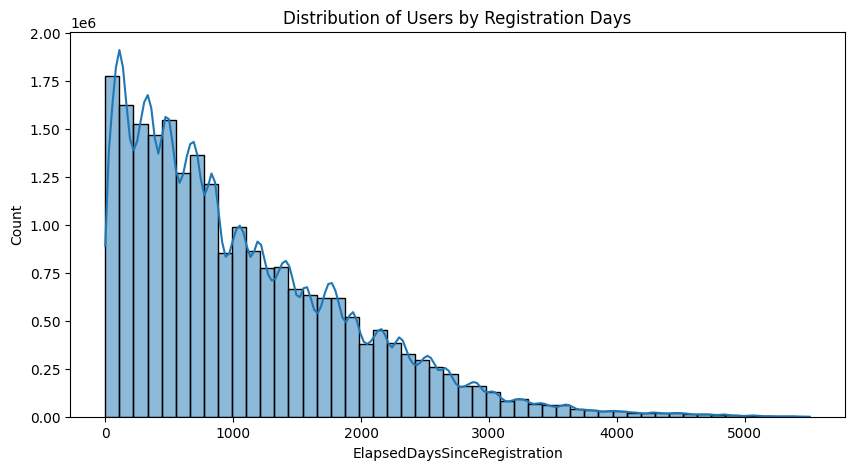

In [13]:
# Distribution of users based on registration days
plt.figure(figsize=(10,5))
sns.histplot(df['ElapsedDaysSinceRegistration'], bins=50, kde=True)
plt.title("Distribution of Users by Registration Days")
plt.show()


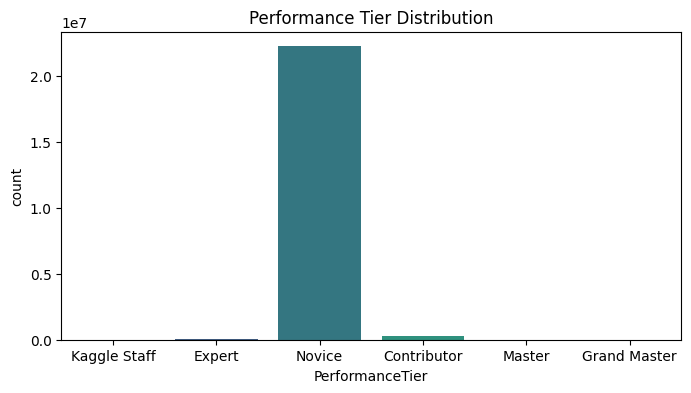

In [14]:
# Count plot of Performance Tiers
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="PerformanceTier", palette="viridis")
plt.title("Performance Tier Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


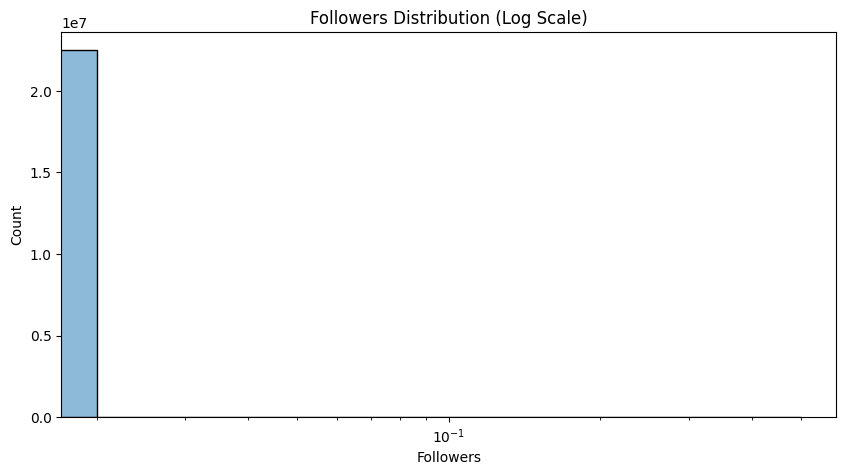

In [15]:
# Followers Distribution (Log Scale for better visibility)
plt.figure(figsize=(10,5))
sns.histplot(df['Followers'], bins=50, kde=True)
plt.xscale("log")
plt.title("Followers Distribution (Log Scale)")
plt.show()

<h3>Geographical analysis Analysis</h3>

Top 10 Countries by Kaggle Users:

Country
<Unknown>         21166415
United States       388275
India               258982
China                50478
United Kingdom       39141
Brazil               34364
Canada               33350
Russia               31634
Japan                24871
Germany              24728
Name: count, dtype: int64


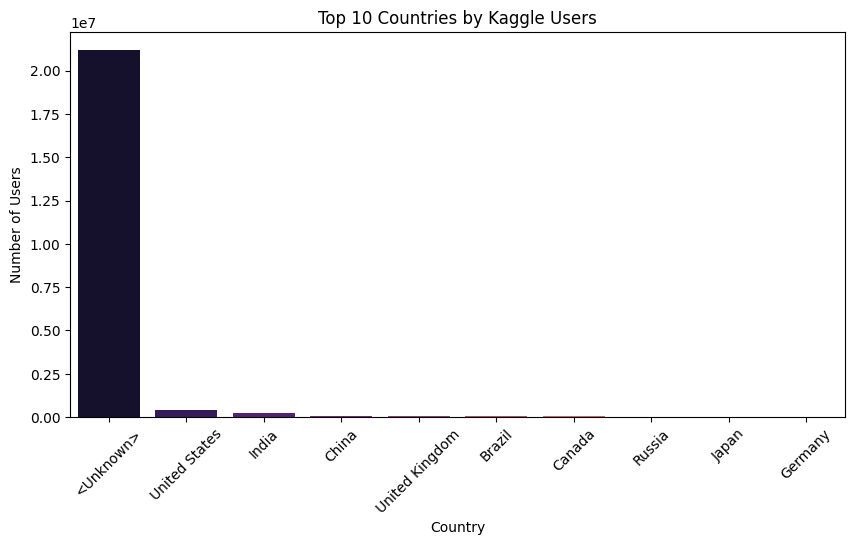

In [12]:
# Count users per country
user_counts = df['Country'].value_counts()

# Display the top 10 countries
print("Top 10 Countries by Kaggle Users:\n")
print(user_counts.nlargest(10))

# Plot Top 10 Countries
plt.figure(figsize=(10,5))
sns.barplot(x=user_counts.nlargest(10).index, y=user_counts.nlargest(10).values, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Number of Users")
plt.title("Top 10 Countries by Kaggle Users")
plt.show()


In [13]:
user_percent = (user_counts / user_counts.sum()) * 100
print(user_percent.nlargest(10))  # Show top 10 as percentages


Country
<Unknown>         94.144124
United States      1.726972
India              1.151902
China              0.224516
United Kingdom     0.174092
Brazil             0.152844
Canada             0.148334
Russia             0.140702
Japan              0.110621
Germany            0.109985
Name: count, dtype: float64


We have a good amount of data of users whose country is unknown

In [ ]:
# World map of user distribution
fig = px.choropleth(df, locations="Country", locationmode="country names", 
                     title="Kaggle User Distribution by Country", 
                     color="PerformanceTier", hover_name="Country",
                     color_continuous_scale="Viridis")
fig.show()

<h3>Time Series Analysis</h3>


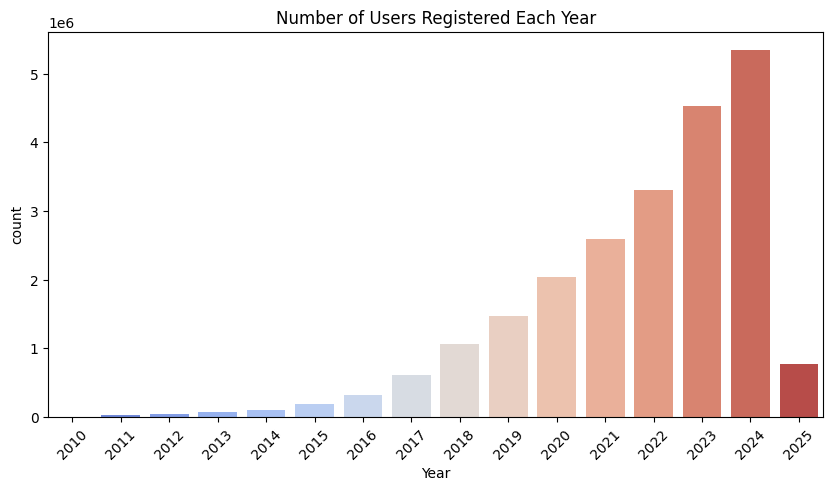

In [16]:
# Users registered over time
df['Year'] = df['RegisterDate'].dt.year
plt.figure(figsize=(10,5))
sns.countplot(x="Year", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Number of Users Registered Each Year")
plt.show()

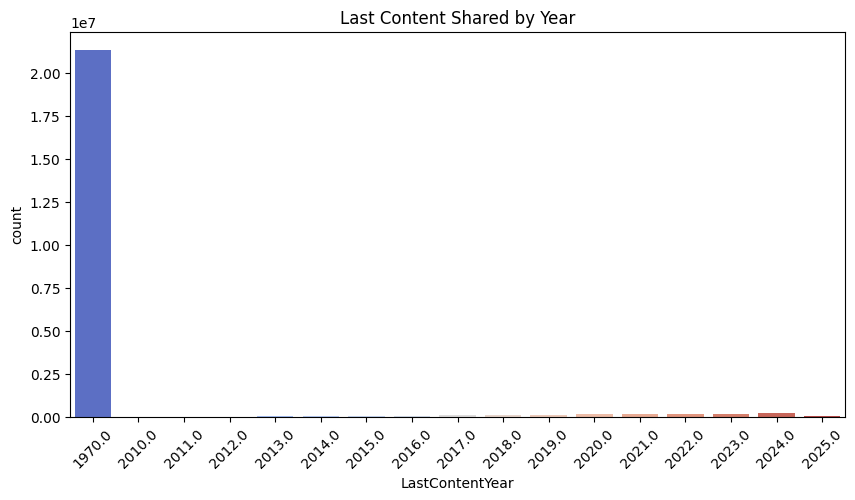

In [18]:
# Last content shared trends
df['LastContentYear'] = df['LastContentDate'].dt.year
plt.figure(figsize=(10,5))
sns.countplot(x="LastContentYear", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Last Content Shared by Year")
plt.show()

<h3>Top 10 Countries For Medals and Submissions</h3>

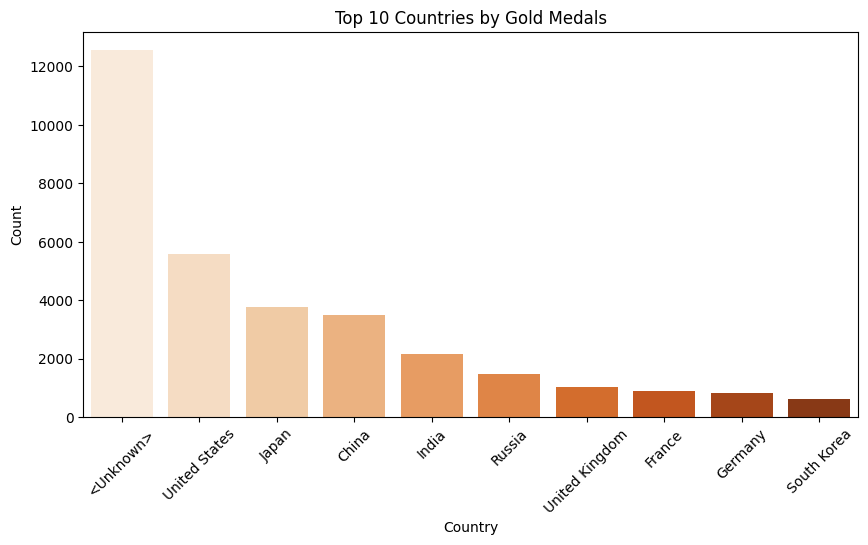

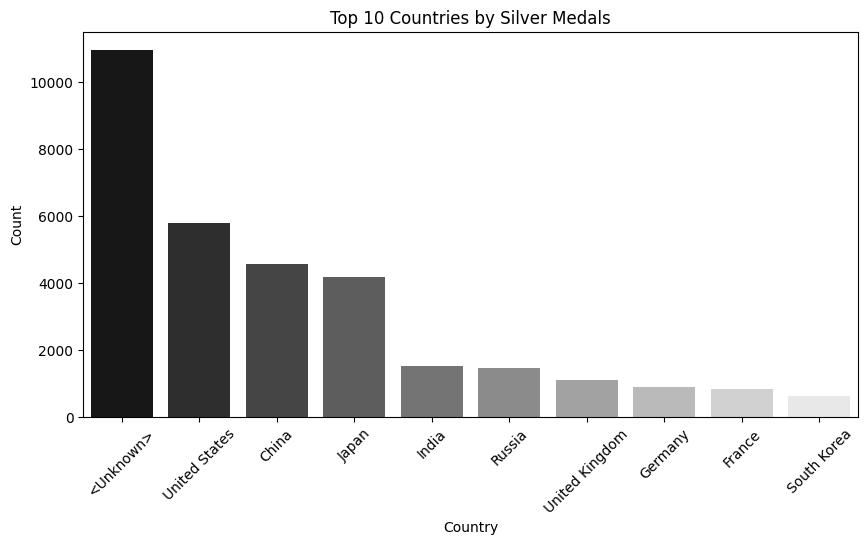

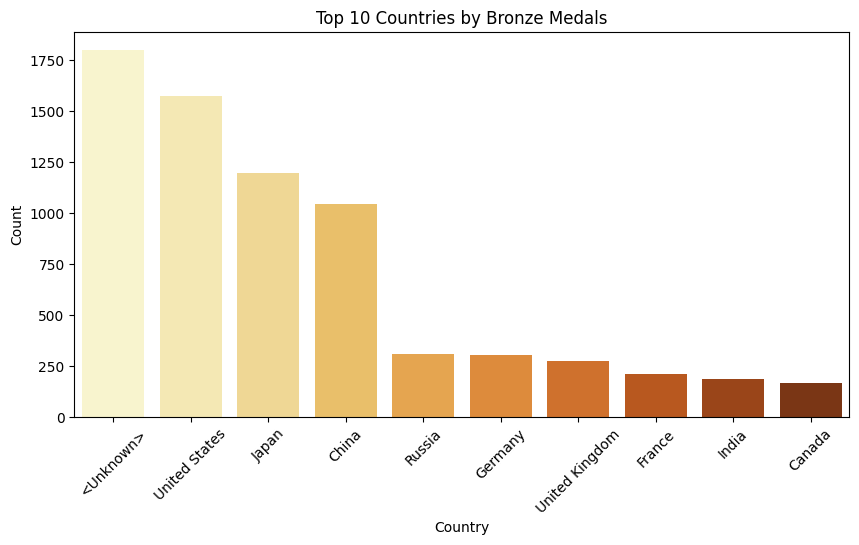

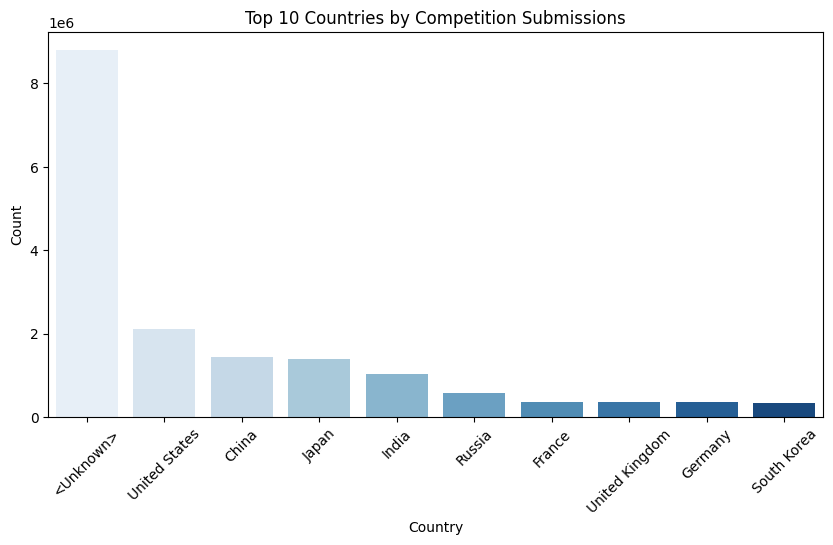

In [22]:
# Grouping data by country
country_stats = df.groupby('Country').agg({
    'GoldCompetitionMedals': 'sum',
    'SilverCompetitionMedals': 'sum',
    'BronzeCompetitionMedals': 'sum',
    'CompetitionSubmissionCount': 'sum'
}).sort_values(by='CompetitionSubmissionCount', ascending=False)  # Sort by submissions for consistency

# Top 10 countries for each category
top_gold = country_stats['GoldCompetitionMedals'].nlargest(10)
top_silver = country_stats['SilverCompetitionMedals'].nlargest(10)
top_bronze = country_stats['BronzeCompetitionMedals'].nlargest(10)
top_submissions = country_stats['CompetitionSubmissionCount'].nlargest(10)

# Function to plot bar charts
def plot_top_countries(data, title, color):
    plt.figure(figsize=(10,5))
    sns.barplot(x=data.index, y=data.values, palette=color)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title(title)
    plt.show()

# Plot each category
plot_top_countries(top_gold, "Top 10 Countries by Gold Medals", "Oranges")
plot_top_countries(top_silver, "Top 10 Countries by Silver Medals", "gray")
plot_top_countries(top_bronze, "Top 10 Countries by Bronze Medals", "YlOrBr")
plot_top_countries(top_submissions, "Top 10 Countries by Competition Submissions", "Blues")

# Preparing Data for Training

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22482991 entries, 0 to 22482991
Data columns (total 40 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   UserId                        int64         
 1   UserName                      object        
 2   RegisterDate                  datetime64[ns]
 3   ElapsedDaysSinceRegistration  int64         
 4   Country                       object        
 5   PerformanceTier               object        
 6   CompetitionsPerformanceTier   object        
 7   DatasetsPerformanceTier       object        
 8   DiscussionsPerformanceTier    object        
 9   NotebooksPerformanceTier      object        
 10  Following                     int64         
 11  Followers                     int64         
 12  DatasetUpvotesGiven           int64         
 13  DatasetUpvotesReceived        int64         
 14  NotebookUpvotesGiven          int64         
 15  NotebookUpvotesReceived       int64

**Country and UserName column has a huge number of unique values**

In [29]:
print(df.PerformanceTier.unique())
print(df.CompetitionsPerformanceTier.unique())
print(df.DatasetsPerformanceTier.unique())
print(df.DiscussionsPerformanceTier.unique())
print(df.NotebooksPerformanceTier.unique())
print(df.LastContentShared.unique())

['Kaggle Staff' 'Expert' 'Novice' 'Contributor' 'Master' 'Grand Master']
['Contributor' 'Novice' 'Master' 'Expert' 'Grand Master']
['Grand Master' 'Expert' 'Contributor' 'Novice' 'Master']
['Contributor' 'Expert' 'Novice' 'Master' 'Grand Master']
['Contributor' 'Expert' 'Novice' 'Master' 'Grand Master']
['Dataset' 'Topic' '<None>' 'Reply' 'Submission' 'Notebook' 'Model']


**All the above columns have few unique values so we can use label encoder to convert categorical values to their numeric form**

**As we will not use userid, country and username columns for any prediction we will drop them**

In [6]:
data = df.drop(columns=['UserId','UserName','Country'])

In [6]:
data.shape

(22482991, 35)

In [8]:
# applying label encoder to convert categorical values to numeric form
cols = ['PerformanceTier','CompetitionsPerformanceTier','DatasetsPerformanceTier',
        'DiscussionsPerformanceTier','NotebooksPerformanceTier','LastContentShared']
le = LabelEncoder()
for c in cols:
    data[c] = le.fit_transform(data[c])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22482991 entries, 0 to 22482991
Data columns (total 35 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   RegisterDate                  datetime64[ns]
 1   ElapsedDaysSinceRegistration  int64         
 2   PerformanceTier               int64         
 3   CompetitionsPerformanceTier   int64         
 4   DatasetsPerformanceTier       int64         
 5   DiscussionsPerformanceTier    int64         
 6   NotebooksPerformanceTier      int64         
 7   Following                     int64         
 8   Followers                     int64         
 9   DatasetUpvotesGiven           int64         
 10  DatasetUpvotesReceived        int64         
 11  NotebookUpvotesGiven          int64         
 12  NotebookUpvotesReceived       int64         
 13  ReplyUpvotesGiven             int64         
 14  ReplyUpvotesReceived          int64         
 15  TopicUpvotesGiven             int64

In [8]:
data.head(n=5)

,RegisterDate,ElapsedDaysSinceRegistration,PerformanceTier,CompetitionsPerformanceTier,DatasetsPerformanceTier,DiscussionsPerformanceTier,NotebooksPerformanceTier,Following,Followers,DatasetUpvotesGiven,...,RepliesCreated,CompetitionTeamCount,CompetitionCount,CompetitionSubmissionCount,BronzeCompetitionMedals,SilverCompetitionMedals,GoldCompetitionMedals,LastContentShared,LastContentDate,LastContentDaysElapsed
0,2011-03-24,5081,3,0,2,0,0,0,612,0,...,0,0,0,0,0,0,0,1,2019-08-21 23:54:39,2008
1,2010-01-20,5509,1,0,1,1,1,6,1215,0,...,499,21,21,59,0,0,0,1,2024-11-01 13:35:36,110
2,2010-01-29,5500,1,0,0,1,0,0,8,2,...,205,16,5,16,0,0,0,6,2014-09-28 07:19:59,3797
3,2010-02-01,5497,5,4,4,4,4,0,0,0,...,0,0,0,0,0,0,0,0,1970-01-01 00:00:00,-1
4,2010-02-02,5496,5,4,4,4,4,0,0,0,...,0,0,0,0,0,0,0,0,1970-01-01 00:00:00,-1


# Models Training and Evaluation

<h2>1- Predicting Gold Medal Achievments</h2>

We want predict how many gold medals a kaggle user will win based on its following statistics:

* Target: GoldCompetitionMedals
* Features and Reasons:
    * CompetitionCount, CompetitionTeamCount - More competitions means more opportunities to win gold medals.
    * CompetitionSubmissionCount - More submissions may indicate persistence and effort.
    * CompetitionsPerformanceTier - Direct indicator of a user's skill in competitions
    * PerformanceTier - Higher overall performance tier often correlates with winning medals.
    * Followers - Influential users may receive collaborations or mentorship improving chances.
    * NotebookUpvotesReceived, DatasetUpvotesReceived - Suggests engagement and skill in data science.

<h3> Load and Prepare Data</h3>

<h4>To find correlation of the target column with other columns</h4>

In [9]:
cm = data.corr()
tg = cm['GoldCompetitionMedals'].sort_values(ascending=False)
print(tg)

GoldCompetitionMedals           1.000000
CompetitionCount                0.661690
CompetitionTeamCount            0.661018
SilverCompetitionMedals         0.623480
CompetitionSubmissionCount      0.464484
BronzeCompetitionMedals         0.342308
TopicUpvotesGiven               0.299048
TopicUpvotesReceived            0.219352
Followers                       0.181745
ReplyUpvotesGiven               0.162583
RepliesCreated                  0.152081
TopicDownvotesReceived          0.149081
ReplyUpvotesReceived            0.147817
ReplyDownvotesReceived          0.144786
Following                       0.119279
LastContentShared               0.112537
NotebookUpvotesReceived         0.108574
LastContentDate                 0.095205
DatasetsCreated                 0.086270
LastContentDaysElapsed          0.073830
TopicsCreated                   0.070656
NotebookUpvotesGiven            0.048223
DatasetUpvotesReceived          0.047143
ElapsedDaysSinceRegistration    0.045078
ModelUpvotesGive

In [18]:
X = data[['CompetitionCount', 'CompetitionTeamCount', 'CompetitionSubmissionCount',
          'CompetitionsPerformanceTier', 'PerformanceTier', 'Followers',
          'NotebookUpvotesReceived', 'DatasetUpvotesReceived']]
Y = data['GoldCompetitionMedals']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, shuffle=True)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17986392, 8)
(4496599, 8)
(17986392,)
(4496599,)


In [22]:
# train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [23]:
# make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# to evaluate the model
def evaluate_model(y_true, y_pred):
    """
    Evaluates the model's performance using various metrics.

    Parameters:
    - y_true: Actual target values
    - y_pred: Predicted target values

    Returns:
    - A dictionary containing MAE, MSE, RMSE, and R² Score
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    metrics = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R² Score': r2
    }
    
    # Print results
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    return metrics

In [27]:
metrics = evaluate_model(Y_test, y_pred)

Mean Absolute Error (MAE): 0.0019
Mean Squared Error (MSE): 0.0020
Root Mean Squared Error (RMSE): 0.0448
R² Score: 0.6440


**The model is performing decently but there is a room for improvement and we can perform different methods: Changing the model, hyperparameter tuning, and feature engineering**

* We will try applying different model

In [30]:
# standardize features important for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

* MLP is sensitive to different scales of data because it uses gradient-based optimization. If features have vastly different ranges, the model might struggle to converge.
* Solution: Use StandardScaler() to normalize data, ensuring all features have a mean of 0 and a standard deviation of 1.

* Why ReLU? The Rectified Linear Unit (ReLU) is computationally efficient and helps prevent the vanishing gradient problem, making deep networks train faster.
 * Alternative: 'tanh' can be used for small datasets but might not perform as well as 'relu' on large datasets.

* Solver:
   * 'adam' (default) is an adaptive optimizer that works well for most cases.
   * Alternatives: 'sgd' (stochastic gradient descent) requires careful learning rate tuning.
* Learning Rate: 'adaptive' means the learning rate decreases if performance plateaus, helping the model converge efficiently.

In [32]:
# Define the model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', 
                    learning_rate='adaptive', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, Y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate='adaptive',
             max_iter=500, random_state=42)

In [33]:
# evaluate the model
y_pred = mlp.predict(X_test_scaled)
metrics = evaluate_model(Y_test, y_pred)

Mean Absolute Error (MAE): 0.0052
Mean Squared Error (MSE): 0.0021
Root Mean Squared Error (RMSE): 0.0462
R² Score: 0.6200


**Both Models Performances can be improved by performing Hypertuning and increasing the layers of the MLP**

<h2>2- Predicting Competition Performance Tier</h2>

* Target: CompetitionsPerformanceTier

* Features & Reasons:
   * CompetitionCount – More competitions increase experience and performance.
   * CompetitionSubmissionCount – High submission frequency suggests a dedicated participant.
   * PerformanceTier,NotebooksPerformanceTier,DatasetPerformanceTier, DiscussionPerformanceTier – A general measure of user skill level.
   * GoldCompetitionMedals, SilverCompetitionMedals, BronzeCompetitionMedals – Medals indicate past success.
   * Followers – Higher recognition may suggest better performance.

In [ ]:
cm = data.corr()
tg = cm['CompetitionsPerformanceTier'].sort_values(ascending=False)
print(tg)

Since Support Vector Classifier (SVC) is sensitive to feature scaling, it is crucial to apply StandardScaler to features that have different scales.

In [ ]:
X = data[['CompetitionCount','CompetitionSubmissionCount','PerformanceTier','DiscussionsPerformanceTier', 'DatasetsPerformanceTier','NotebooksPerformanceTier','GoldCompetitionMedals','SilverCompetitionMedals','BronzeCompetitionMedals','Followers']]
Y = data['CompetitionsPerformanceTier']
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.2)

In [ ]:
# Train SVC model
svc_model = SVC(kernel='rbf', C=1, gamma='scale')  # RBF kernel is commonly used
svc_model.fit(X_train, Y_train)

In [ ]:
# Evaluate model
accuracy = svc_model.score(X_test, Y_test)
print(f'SVC Model Accuracy: {accuracy:.4f}')

<h2> 3- Predicting User Dropout (Inactive Users)</h2>

* Target: LastContentDaysElapsed (High value = Dropout risk)
* Features & Reasons:
    * ElapsedDaysSinceRegistration – Newer users are more likely to stay active.
    * CompetitionCount, NotebooksCreated, DatasetsCreated – Active engagement means less likelihood of dropout.
    * PerformanceTier – Grandmasters and experts are more likely to stay.

In [ ]:
cm = data.corr()
tg = cm['LastContentDaysElapsed'].sort_values(ascending=False)
print(tg)

In [ ]:
# Select Features (X) and Target (Y)
X = data[['ElapsedDaysSinceRegistration', 'CompetitionCount', 'NotebooksCreated', 
          'DatasetsCreated', 'PerformanceTier']]
Y = data['LastContentDaysElapsed']

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, Y_train)

In [ ]:
# Predict on the test set
Y_pred = xgb_model.predict(X_test)

In [ ]:
# evaluate the model
metrics = evaluate_model(Y_test, y_pred)

<h2>4- Predicting Overall Performance Tier of a User:</h2>

* Target: PerformanceTier
* Features & Reasons:
    * CompetitionsPerformanceTier, DatasetsPerformanceTier, NotebooksPerformanceTier, DiscussionsPerformanceTier – Direct indicators of a user’s expertise.
    * CompetitionCount, NotebooksCreated – More contributions indicate experience and skill.

In [ ]:
cm = data.corr()
tg = cm['PerformanceTier'].sort_values(ascending=False)
print(tg)

In [ ]:
X = data[['CompetitionsPerformanceTier','DatasetsPerformanceTier','NotebooksPerformanceTier',
          'DiscussionsPerformanceTier','CompetitionCount','NotebooksCreated']]
Y = data['PerformanceTier']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2)


In [ ]:
# initialize and train the model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(Xtrain, Ytrain)

In [ ]:
# make predictions
Y_pred = dt_model.predict(Xtest)

In [ ]:
# Evaluate model
accuracy = accuracy_score(Ytest, Y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(Ytest, Y_pred))